In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import Ridge, Lasso, ElasticNet, LinearRegression
from sklearn.linear_model import RidgeCV, LassoCV, ElasticNetCV
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
import warnings

In [51]:
warnings.filterwarnings('ignore')

In [52]:
df = pd.read_csv("./src/processed_home_prices.csv")
df

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3.0,1.00,1180.000000,5650.0,1.0,0.0,0.0,3.0,7.0,1180.0,0.0,1955.0,0.0,98178.0,47.5112,-122.257,1340.0,5650.0
1,538000.0,3.0,2.25,2570.000000,7242.0,2.0,0.0,0.0,3.0,7.0,2170.0,400.0,1951.0,1991.0,98125.0,47.7210,-122.319,1690.0,7639.0
2,180000.0,2.0,1.00,770.000000,10000.0,1.0,0.0,0.0,3.0,6.0,770.0,0.0,1933.0,0.0,98028.0,47.7379,-122.233,2720.0,8062.0
3,604000.0,4.0,3.00,2090.976178,5000.0,1.0,0.0,0.0,5.0,7.0,1050.0,910.0,1965.0,0.0,98136.0,47.5208,-122.393,1360.0,5000.0
4,510000.0,3.0,2.00,1490.210641,8080.0,1.0,0.0,0.0,3.0,8.0,1680.0,0.0,1987.0,0.0,98074.0,47.6168,-122.045,1800.0,7503.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21597,360000.0,3.0,2.50,1530.000000,1131.0,3.0,0.0,0.0,3.0,8.0,1530.0,0.0,2009.0,0.0,98103.0,47.6993,-122.346,1530.0,1509.0
21598,400000.0,4.0,2.50,2310.000000,5813.0,2.0,0.0,0.0,3.0,8.0,2310.0,0.0,2014.0,0.0,98146.0,47.5107,-122.362,1830.0,7200.0
21599,402101.0,2.0,0.75,1020.000000,1350.0,2.0,0.0,0.0,3.0,7.0,1020.0,0.0,2009.0,0.0,98144.0,47.5944,-122.299,1020.0,2007.0
21600,400000.0,3.0,2.50,1600.000000,2388.0,2.0,0.0,0.0,3.0,8.0,1600.0,0.0,2004.0,0.0,98027.0,47.5345,-122.069,1410.0,1287.0


In [53]:
y = df['price']
X = df.drop(['price'], axis=1)

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [6]:
def implementMlAlgorithm(alg):
    model = alg().fit(X_train, y_train)
    print("For " + alg.__name__, " pre RMSE: ", np.sqrt(mean_squared_error(y_test, model.predict(X_test))))

# Linear Regression Models

In [7]:
linear_models = [Ridge, Lasso, ElasticNet, LinearRegression]

In [8]:
for algorithm in linear_models:
    implementMlAlgorithm(algorithm)

For Ridge  pre RMSE:  219904.12762784347
For Lasso  pre RMSE:  219874.73523069333
For ElasticNet  pre RMSE:  247664.42729526752
For LinearRegression  pre RMSE:  219887.10448716284


### Ridge

In [22]:
?Ridge

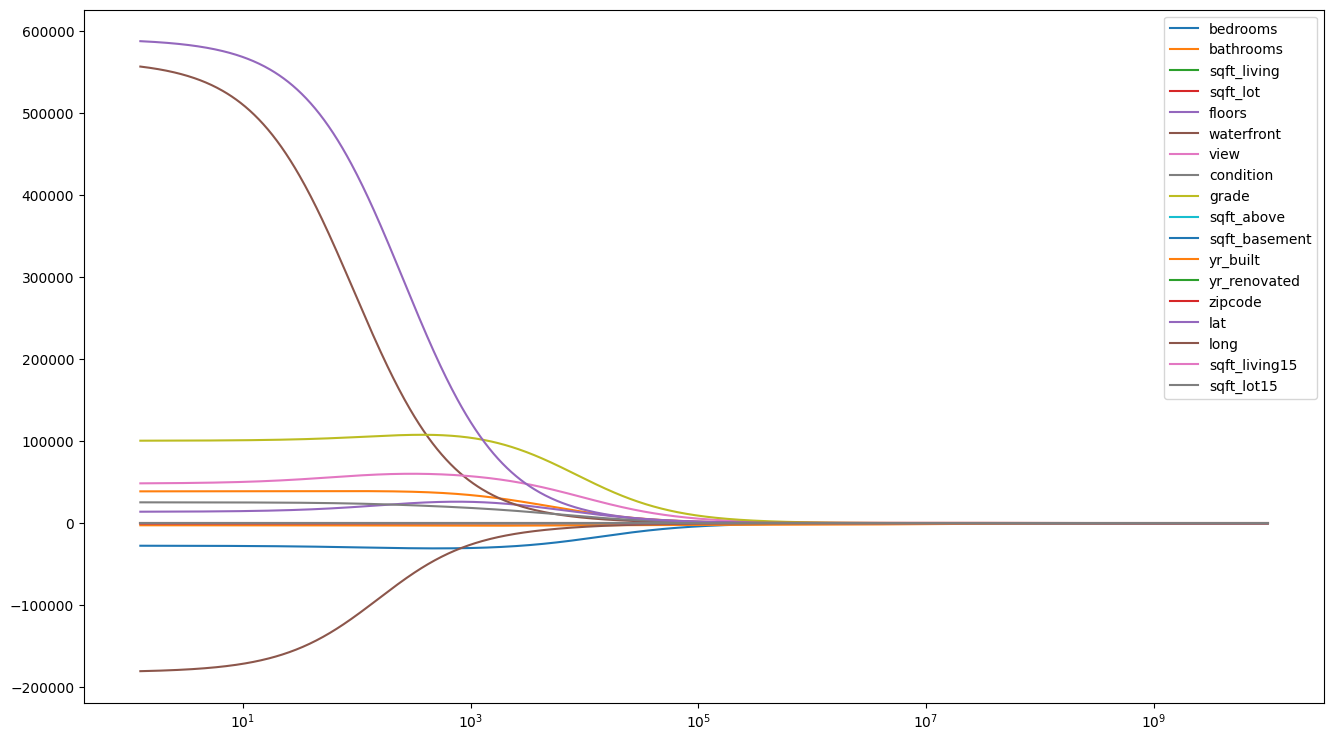

In [25]:
# relations between alpha and variables
alphas = 10 ** np.linspace(0.1, 10, 1000)
coefs = []

for i in alphas:
    coefs.append(Ridge(alpha=i).fit(X_train, y_train).coef_)

plt.figure(figsize=[16, 9])
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.legend(df.columns.drop('price'))

In [18]:
alphas = np.linspace(0.1, 5, 100)
ridge_cv_model = RidgeCV(alphas=alphas, scoring="neg_mean_squared_error", cv=10)
ridge_cv_model.fit(X_train, y_train)

RidgeCV(alphas=array([0.1       , 0.14949495, 0.1989899 , 0.24848485, 0.2979798 ,
       0.34747475, 0.3969697 , 0.44646465, 0.4959596 , 0.54545455,
       0.59494949, 0.64444444, 0.69393939, 0.74343434, 0.79292929,
       0.84242424, 0.89191919, 0.94141414, 0.99090909, 1.04040404,
       1.08989899, 1.13939394, 1.18888889, 1.23838384, 1.28787879,
       1.33737374, 1.38686869, 1.43636364, 1.48585859, 1.53535354,
       1.5848484...
       3.56464646, 3.61414141, 3.66363636, 3.71313131, 3.76262626,
       3.81212121, 3.86161616, 3.91111111, 3.96060606, 4.01010101,
       4.05959596, 4.10909091, 4.15858586, 4.20808081, 4.25757576,
       4.30707071, 4.35656566, 4.40606061, 4.45555556, 4.50505051,
       4.55454545, 4.6040404 , 4.65353535, 4.7030303 , 4.75252525,
       4.8020202 , 4.85151515, 4.9010101 , 4.95050505, 5.        ]),
        cv=10, scoring='neg_mean_squared_error')

In [19]:
ridge_cv_model.alpha_

1.0898989898989901

In [21]:
ridge_tuned = Ridge(alpha=ridge_cv_model.alpha_).fit(X_train, y_train)

In [27]:
# RMSE
np.sqrt(mean_squared_error(y_test, ridge_tuned.predict(X_test)))

219905.7237110652

In [23]:
# Cross validation RMSE
np.sqrt(np.mean(-cross_val_score(ridge_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

216601.57849398622

### Lasso

In [13]:
alphas = 10 ** np.linspace(0.1, 10, 100)
coefs = []

for i in alphas:
    coefs.append(Lasso(alpha=i).fit(X_train, y_train).coef_)

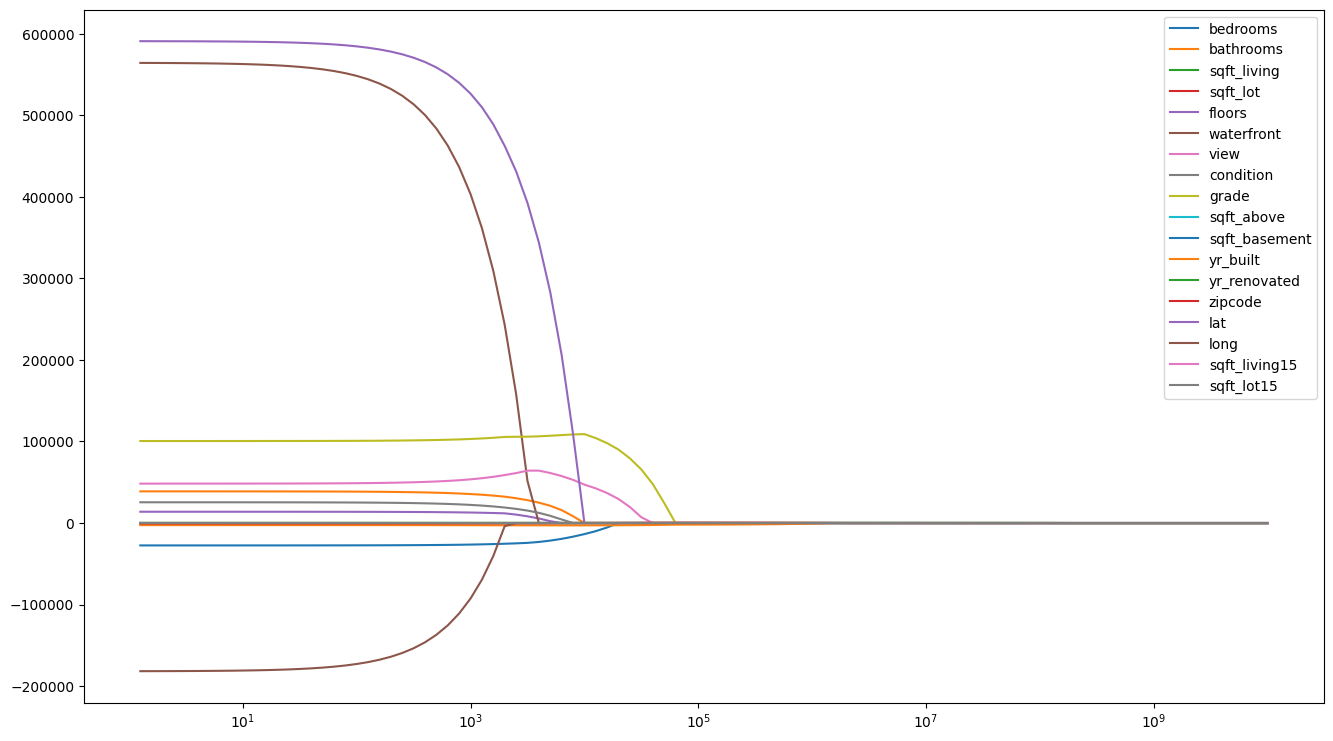

In [15]:
plt.figure(figsize=[16, 9])
ax = plt.gca()
ax.plot(alphas, coefs)
ax.set_xscale("log")
ax.legend(df.columns.drop('price'));

In [9]:
alphas = np.linspace(0.1, 5, 100)
lasso_cv_model = LassoCV(alphas=alphas, cv=10, max_iter=10000).fit(X_train, y_train)

In [12]:
lasso_tuned = Lasso().set_params(alpha=lasso_cv_model.alpha_).fit(X_train, y_train)

In [16]:
np.sqrt(mean_squared_error(y_test, lasso_tuned.predict(X_test)))

219878.06429388598

In [24]:
np.sqrt(np.mean(-cross_val_score(lasso_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

216622.18727670397

In [28]:
pd.Series(lasso_tuned.coef_, index=X_train.columns)

bedrooms         -27457.022552
bathrooms         38808.783106
sqft_living         249.519562
sqft_lot              0.131479
floors            13853.986945
waterfront       563690.092330
view              48348.590214
condition         25437.272215
grade            100566.229068
sqft_above         -105.645636
sqft_basement      -120.323313
yr_built          -2562.002125
yr_renovated         18.517101
zipcode            -504.621940
lat              590660.833847
long            -181359.886611
sqft_living15        36.978374
sqft_lot15           -0.316016
dtype: float64

### LinearRegression

In [33]:
l_tuned_model = LinearRegression().fit(X_train, y_train)

In [34]:
np.sqrt(mean_squared_error(y_test, l_tuned_model.predict(X_test)))

219887.10448716284

In [35]:
np.sqrt(np.mean(-cross_val_score(l_tuned_model, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

216607.07405279807

### ElasticNet

In [36]:
alphas = np.linspace(0.1, 5, 100)
enet_cv_model = ElasticNetCV(alphas=alphas, cv=10).fit(X_train, y_train)

In [37]:
enet_tuned = ElasticNet(alpha=enet_cv_model.alpha_).fit(X_test, y_test)

In [38]:
np.sqrt(mean_squared_error(y_test, enet_tuned.predict(X_test)))

227792.3228301089

In [39]:
np.sqrt(np.mean(-cross_val_score(enet_tuned, X_test, y_test, cv=10, scoring="neg_mean_squared_error")))

229397.1914660106

In [57]:
p = enet_tuned.predict(X_train)
p

array([ 878387.11022501,  178529.09661489,  250322.18806296, ...,
        447197.23339401,  -79688.23382626, 1239266.19224743])

In [56]:
y_test

17803     334500.0
10250     720001.0
12381     207000.0
6407      565000.0
15365     340000.0
           ...    
518      2250000.0
8478      330000.0
20258     300000.0
10586     373000.0
20149     334500.0
Name: price, Length: 5401, dtype: float64